In [9]:
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import sklearn
import scanpy as sc
import os
import glob
import anndata as ad

In [10]:
spatialLIBD_dir = 'data/spatialLIBD'

In [11]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
cffi                1.15.1
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           0.9.1
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.15.1
ipython_genutils    0.2.0
ipywidgets          7.7.1
jedi                0.18.1
joblib              1.1.0
jupyter_server      1.18.1
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.38.1
matplotlib          3.5.1
matplotlib_inline   NA
mpl_toolkits        NA
natsort             8.1.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.55.2
numexpr             2.8.3
numpy               1.22.4
packaging

In [12]:
# temp = pd.read_pickle('data/spatialLIBD_data/temp.pkl')
# dlpfc = pd.read_pickle('data/spatialLIBD_data/dlpfc.pkl')

In [13]:
# sample_ids = temp.index.get_level_values('sample_id').unique()

In [14]:
# temp.loc[sample_ids[0]]

In [15]:

# # adata_spatial_anterior = sc.datasets.visium_sge(
# #     sample_id="V1_Mouse_Brain_Sagittal_Anterior"
# # )
# # adata_spatial_posterior = sc.datasets.visium_sge(
# #     sample_id="V1_Mouse_Brain_Sagittal_Posterior"
# # )
# adata_dir = os.path.join(spatialLIBD_dir, 'adata')
# if not os.path.exists(adata_dir):
#     os.makedirs(adata_dir)

# for sample_id in sample_ids:
#     print(f'Creating adata for sample_id {sample_id}')

#     adata_spatialLIBD = sc.AnnData(temp.loc[sample_id], dtype=np.float32)
#     sc.pp.normalize_total(adata_spatialLIBD, inplace=True)
#     adata_spatialLIBD.obs = pd.concat([adata_spatialLIBD.obs, dlpfc.loc[sample_id, ['in_tissue', 'X', 'Y']]], axis=1, join='inner')
#     adata_spatialLIBD.X = csr_matrix(adata_spatialLIBD.X)
#     adata_spatialLIBD.write(os.path.join(adata_dir, f'adata_spatialLIBD-{sample_id}.h5ad'))

In [19]:
adata_dir = os.path.join(spatialLIBD_dir, 'adata')

adata_spatialLIBD_d = {}

for name in glob.glob(os.path.join(adata_dir, 'adata_spatialLIBD-*.h5ad')):
    sample_id = int(name.partition("-")[2].rpartition(".")[0])
    # print(sample_id)
    adata_spatialLIBD_d[sample_id] = sc.read_h5ad(name)

# Single cell Data: GSE115746


In [21]:
# adata_sc_dlpfc = sc.read_mtx('data/sc_dlpfc/GSE144136_GeneBarcodeMatrix_Annotated.mtx').T

In [22]:
# adata_sc_dlpfc_var_names = pd.read_csv('data/sc_dlpfc/GSE144136_GeneNames.csv', index_col=0).x
# adata_sc_dlpfc_obs_names = pd.read_csv('data/sc_dlpfc/GSE144136_CellNames.csv', index_col=0).x

In [23]:
# adata_sc_dlpfc.var_names.astype(int).is_monotonic_increasing #.map(adata_sc_dlpfc_var_names.to_dict())

In [24]:
# adata_sc_dlpfc.obs_names.astype(int).is_monotonic_increasing

In [25]:
# adata_sc_dlpfc.var_names = adata_sc_dlpfc_var_names
# adata_sc_dlpfc.obs_names = adata_sc_dlpfc_obs_names

In [26]:
# adata_sc_dlpfc = adata_sc_dlpfc[adata_sc_dlpfc.obs.index.str.contains('Control')]

In [27]:
# adata_sc_dlpfc.obs['cell_subclass'] = adata_sc_dlpfc.obs.index.str.split('.', expand=True).get_level_values(0)

In [28]:
# adata_sc_dlpfc.obs['cell_subclass'].unique()

In [29]:
# adata_sc_dlpfc.X = csr_matrix(adata_sc_dlpfc.X)

In [30]:
# sc.pp.normalize_total(adata_sc_dlpfc, inplace=True)
# adata_sc_dlpfc.var_names_make_unique()
# adata_sc_dlpfc.write('data/sc_dlpfc/adata_sc_dlpfc.h5ad')

In [31]:
adata_sc_dlpfc = sc.read_h5ad('data/sc_dlpfc/adata_sc_dlpfc.h5ad')
adata_sc_dlpfc.var_names_make_unique()

In [32]:
adata_sc_dlpfc

AnnData object with n_obs × n_vars = 35212 × 30062
    obs: 'cell_subclass'

In [33]:
sc.tl.rank_genes_groups(adata_sc_dlpfc, 'cell_subclass', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:52)


/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWa

In [34]:
genelists=adata_sc_dlpfc.uns['rank_genes_groups']['names']
df_genelists = pd.DataFrame.from_records(genelists)
df_genelists.head(5)

num_markers=20
res_genes = []
for column in df_genelists.head(num_markers): 
    res_genes.extend(df_genelists.head(num_markers)[column].tolist())
res_genes_ = list(set(res_genes))

In [73]:
import anndata as ad


adata_spatialLIBD = ad.concat([adata_spatialLIBD_d[151510]], label='sample_id', keys = [151510])
adata_spatialLIBD.obs_names_make_unique()


In [74]:
adata_spatialLIBD.var_names_make_unique() 
inter_genes = [val for val in res_genes_ if val in adata_spatialLIBD.var.index]
print('Selected Feature Gene number',len(inter_genes))
adata_sc_dlpfc = adata_sc_dlpfc[:,inter_genes]

adata_spatialLIBD = adata_spatialLIBD[:,inter_genes]

Selected Feature Gene number 362


In [75]:
from sklearn.preprocessing import OneHotEncoder

def random_mix(Xs, ys, nmix=5, n_samples=10000, seed=0):
    # Define empty lists
    Xs_new, ys_new =[], []
    ys_ = OneHotEncoder().fit_transform(ys.reshape(-1, 1)).toarray()

    rstate = np.random.RandomState(seed)
    fraction_all = rstate.rand(n_samples, nmix)
    randindex_all = rstate.randint(len(Xs), size=(n_samples,nmix))

    for i in range(n_samples):
        # fraction: random fraction across the "nmix" number of sampled cells
        fraction = fraction_all[i]
        fraction = fraction/np.sum(fraction)
        fraction = np.reshape(fraction, (nmix,1))
        
        # Random selection of the single cell data by the index
        randindex = randindex_all[i]
        ymix = ys_[randindex]
        # Calculate the fraction of cell types in the cell mixture
        yy = np.sum(ymix*fraction, axis=0)
        # Calculate weighted gene expression of the cell mixture
        XX = np.asarray(Xs[randindex])*fraction
        XX_ = np.sum(XX, axis=0)
        
        # Add cell type fraction & composite gene expression in the list
        ys_new.append(yy)
        Xs_new.append(XX_)

    Xs_new = np.asarray(Xs_new)
    ys_new = np.asarray(ys_new)

    return Xs_new, ys_new

In [76]:
mat_sc = adata_sc_dlpfc.X.todense()
mat_sp = adata_spatialLIBD.X.todense()

df_sc = adata_sc_dlpfc.obs

lab_sc_sub = df_sc.cell_subclass
sc_sub_dict = dict(zip(range(len(set(lab_sc_sub))), set(lab_sc_sub)))
sc_sub_dict2 = dict((y,x) for x,y in sc_sub_dict.items())
lab_sc_num = [sc_sub_dict2[ii] for ii in lab_sc_sub]
lab_sc_num = np.asarray(lab_sc_num, dtype='int')

sc_mix, lab_mix = random_mix(mat_sc, lab_sc_num, nmix=8, n_samples=len(mat_sp))

def log_minmaxscale(arr):
    arrd = len(arr)
    arr = np.log1p(arr)
    return (arr-np.reshape(np.min(arr,axis=1), (arrd,1)))/np.reshape((np.max(arr, axis=1)-np.min(arr,axis=1)),(arrd,1))

sc_mix_s = log_minmaxscale(sc_mix)
mat_sp_s = log_minmaxscale(mat_sp)
mat_sc_s = log_minmaxscale(mat_sc)


In [77]:
OneHotEncoder().fit_transform(lab_sc_num.reshape(-1, 1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
mat_sc.shape

(35212, 362)

In [79]:
pd.DataFrame(sc_mix_s).std().mean()

0.11467599890915829

In [80]:
pd.DataFrame(mat_sp_s).std().mean()

0.10460731387138367

In [81]:
pd.DataFrame(sc_mix_s).mean().mean()

0.2093858092542785

In [82]:
pd.DataFrame(mat_sp_s).mean().mean()

0.10531681776046753

In [83]:
adata_spatialLIBD.obs.sample_id

spot
AAACAAGTATCTCCCA-1    151510
AAACACCAATAACTGC-1    151510
AAACAGAGCGACTCCT-1    151510
AAACAGCTTTCAGAAG-1    151510
AAACAGGGTCTATATT-1    151510
                       ...  
TTGTTTCACATCCAGG-1    151510
TTGTTTCATTAGTCTA-1    151510
TTGTTTCCATACAACT-1    151510
TTGTTTGTATTACACG-1    151510
TTGTTTGTGTAAATTC-1    151510
Name: sample_id, Length: 4634, dtype: category
Categories (1, int64): [151510]

In [84]:
mat_sp_s_df = pd.DataFrame(mat_sp_s)
mat_sp_s_df.index = pd.MultiIndex.from_arrays([adata_spatialLIBD.obs.sample_id, mat_sp_s_df.index])
mat_sp_s_df

0         1    2         3    4         5         6    \
sample_id                                                                    
151510    0     0.000000  0.000000  0.0  0.439252  0.0  0.000000  0.000000   
          1     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
          2     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
          3     0.000000  0.000000  0.0  0.306686  0.0  0.479508  0.000000   
          4     0.000000  0.000000  0.0  0.218590  0.0  0.000000  0.000000   
...                  ...       ...  ...       ...  ...       ...       ...   
          4629  0.000000  0.000000  0.0  0.000000  0.0  0.489050  0.312692   
          4630  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
          4631  0.402032  0.000000  0.0  0.000000  0.0  0.515792  0.000000   
          4632  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
          4633  0.202707  0.202707  0.0  0.000000  0.0  0.000000  0.000000   

                7    8         9    ...  352       353       354       355  \
sample_id                           ...                                      
151510    0     0.0  0.0  0.000000  ...  0.0  0.439252  0.000000  0.000000   
          1     0.0  0.0  0.000000  ...  0.0  0.000000  0.260019  0.000000   
          2     0.0  0.0  0.245974  ...  0.0  0.000000  0.576572  0.000000   
          3     0.0  0.0  0.000000  ...  0.0  0.402211  0.544433  0.181597   
          4     0.0  0.0  0.000000  ...  0.0  0.218590  0.548081  0.000000   
...             ...  ...       ...  ...  ...       ...       ...       ...   
          4629  0.0  0.0  0.000000  ...  0.0  0.000000  0.489050  0.000000   
          4630  0.0  0.0  0.000000  ...  0.0  0.000000  0.000000  0.000000   
          4631  0.0  0.0  0.246603  ...  0.0  0.246603  0.246603  0.000000   
          4632  0.0  0.0  0.292989  ...  0.0  0.000000  0.000000  0.000000   
          4633  0.0  0.0  0.000000  ...  0.0  0.000000  0.202707  0.000000   

                356  357  358  359       360       361  
sample_id                                               
151510    0     0.0  0.0  0.0  0.0  0.000000  0.000000  
          1     0.0  0.0  0.0  0.0  0.000000  0.000000  
          2     0.0  0.0  0.0  0.0  0.000000  0.000000  
          3     0.0  0.0  0.0  0.0  0.000000  0.000000  
          4     0.0  0.0  0.0  0.0  0.000000  0.000000  
...             ...  ...  ...  ...       ...       ...  
          4629  0.0  0.0  0.0  0.0  0.000000  0.000000  
          4630  0.0  0.0  0.0  0.0  0.307956  0.000000  
          4631  0.0  0.0  0.0  0.0  0.515792  0.246603  
          4632  0.0  0.0  0.0  0.0  0.292989  0.292989  
          4633  0.0  0.0  0.0  0.0  0.000000  0.202707  

[4634 rows x 362 columns]

In [85]:
sc_mix_s_df = pd.DataFrame(sc_mix_s)
sc_mix_s_df.index = pd.MultiIndex.from_arrays([[0 for _ in range(len(sc_mix_s_df))], sc_mix_s_df.index])
sc_mix_s_df

0         1         2         3        4         5         6    \
0 0     0.106391  0.189642  0.637015  0.000000  0.00000  0.133715  0.408029   
  1     0.381477  0.215093  0.554672  0.000000  0.00000  0.026830  0.000000   
  2     0.101714  0.208772  0.550763  0.039515  0.05595  0.058981  0.000000   
  3     0.328546  0.160428  0.649124  0.027880  0.00000  0.027248  0.266734   
  4     0.064015  0.099504  0.705420  0.095768  0.00000  0.000000  0.105055   
...          ...       ...       ...       ...      ...       ...       ...   
  4629  0.166249  0.219878  0.681006  0.103497  0.00000  0.003743  0.002166   
  4630  0.493745  0.111966  0.603812  0.017273  0.00000  0.100496  0.065043   
  4631  0.061870  0.122515  0.664511  0.000000  0.00000  0.143856  0.218546   
  4632  0.197566  0.285821  0.651928  0.015536  0.00000  0.000000  0.130724   
  4633  0.358056  0.151625  0.423089  0.038518  0.00000  0.000000  0.038518   

             7         8         9    ...       352       353       354  \
0 0     0.000000  0.213464  0.000000  ...  0.000000  0.082079  0.107006   
  1     0.000000  0.358584  0.179607  ...  0.051220  0.075142  0.421081   
  2     0.000000  0.268838  0.000000  ...  0.016536  0.135422  0.320028   
  3     0.000000  0.367034  0.000000  ...  0.043097  0.152535  0.256888   
  4     0.023181  0.290399  0.000000  ...  0.097977  0.000000  0.286990   
...          ...       ...       ...  ...       ...       ...       ...   
  4629  0.000000  0.260721  0.000000  ...  0.011121  0.007450  0.100163   
  4630  0.000000  0.204882  0.077590  ...  0.042169  0.035616  0.175341   
  4631  0.000000  0.402354  0.018302  ...  0.009276  0.215534  0.282853   
  4632  0.000000  0.370910  0.000000  ...  0.374042  0.098188  0.425338   
  4633  0.073883  0.022959  0.000000  ...  0.038518  0.000000  0.222299   

             355       356       357       358       359       360       361  
0 0     0.000000  0.415133  0.764876  0.225937  0.091704  0.000000  0.434452  
  1     0.000000  0.243516  0.820973  0.045067  0.000000  0.000000  0.536269  
  2     0.204792  0.278564  0.481681  0.000000  0.165241  0.000000  0.461349  
  3     0.000000  0.182031  0.779743  0.140560  0.000000  0.014888  0.442299  
  4     0.114131  0.363093  0.777778  0.162868  0.000000  0.010698  0.550122  
...          ...       ...       ...       ...       ...       ...       ...  
  4629  0.270787  0.424198  0.854616  0.041104  0.037713  0.000000  0.536498  
  4630  0.050174  0.469681  0.617458  0.139400  0.133187  0.017273  0.356119  
  4631  0.262404  0.466365  0.595736  0.189831  0.018302  0.000000  0.382898  
  4632  0.311350  0.247738  0.695856  0.116195  0.116195  0.000000  0.534645  
  4633  0.038518  0.290286  0.782398  0.194801  0.000000  0.000000  0.321420  

[4634 rows x 362 columns]

In [86]:
all_df = pd.concat([sc_mix_s_df, mat_sp_s_df], keys = [0, 1])

In [87]:
all_df

0         1         2         3        4         5    \
0 0      0     0.106391  0.189642  0.637015  0.000000  0.00000  0.133715   
         1     0.381477  0.215093  0.554672  0.000000  0.00000  0.026830   
         2     0.101714  0.208772  0.550763  0.039515  0.05595  0.058981   
         3     0.328546  0.160428  0.649124  0.027880  0.00000  0.027248   
         4     0.064015  0.099504  0.705420  0.095768  0.00000  0.000000   
...                 ...       ...       ...       ...      ...       ...   
1 151510 4629  0.000000  0.000000  0.000000  0.000000  0.00000  0.489050   
         4630  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
         4631  0.402032  0.000000  0.000000  0.000000  0.00000  0.515792   
         4632  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
         4633  0.202707  0.202707  0.000000  0.000000  0.00000  0.000000   

                    6         7         8         9    ...       352  \
0 0      0     0.408029  0.000000  0.213464  0.000000  ...  0.000000   
         1     0.000000  0.000000  0.358584  0.179607  ...  0.051220   
         2     0.000000  0.000000  0.268838  0.000000  ...  0.016536   
         3     0.266734  0.000000  0.367034  0.000000  ...  0.043097   
         4     0.105055  0.023181  0.290399  0.000000  ...  0.097977   
...                 ...       ...       ...       ...  ...       ...   
1 151510 4629  0.312692  0.000000  0.000000  0.000000  ...  0.000000   
         4630  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
         4631  0.000000  0.000000  0.000000  0.246603  ...  0.000000   
         4632  0.000000  0.000000  0.000000  0.292989  ...  0.000000   
         4633  0.000000  0.000000  0.000000  0.000000  ...  0.000000   

                    353       354       355       356       357       358  \
0 0      0     0.082079  0.107006  0.000000  0.415133  0.764876  0.225937   
         1     0.075142  0.421081  0.000000  0.243516  0.820973  0.045067   
         2     0.135422  0.320028  0.204792  0.278564  0.481681  0.000000   
         3     0.152535  0.256888  0.000000  0.182031  0.779743  0.140560   
         4     0.000000  0.286990  0.114131  0.363093  0.777778  0.162868   
...                 ...       ...       ...       ...       ...       ...   
1 151510 4629  0.000000  0.489050  0.000000  0.000000  0.000000  0.000000   
         4630  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         4631  0.246603  0.246603  0.000000  0.000000  0.000000  0.000000   
         4632  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         4633  0.000000  0.202707  0.000000  0.000000  0.000000  0.000000   

                    359       360       361  
0 0      0     0.091704  0.000000  0.434452  
         1     0.000000  0.000000  0.536269  
         2     0.165241  0.000000  0.461349  
         3     0.000000  0.014888  0.442299  
         4     0.000000  0.010698  0.550122  
...                 ...       ...       ...  
1 151510 4629  0.000000  0.000000  0.000000  
         4630  0.000000  0.307956  0.000000  
         4631  0.000000  0.515792  0.246603  
         4632  0.000000  0.292989  0.292989  
         4633  0.000000  0.000000  0.202707  

[9268 rows x 362 columns]

In [88]:
all_z_df = all_df.copy()

In [89]:
from sklearn.preprocessing import StandardScaler

all_z_df.loc[0] = StandardScaler().fit_transform(all_z_df.loc[0])
for sample_id in all_z_df.loc[1].index.get_level_values(0).unique():
    all_z_df.loc[(1, sample_id)] = StandardScaler().fit_transform(all_z_df.loc[(1, sample_id)])

In [90]:
all_z_df

0         1         2         3         4         5    \
0 0      0    -0.919861 -0.005261  0.225494 -0.648481 -0.201364  0.997872   
         1     1.582591  0.253689 -0.514822 -0.648481 -0.201364 -0.398409   
         2    -0.962415  0.189380 -0.549966 -0.205931  1.434000  0.021592   
         3     1.101074 -0.302500  0.334365 -0.336232 -0.201364 -0.392955   
         4    -1.305363 -0.922376  0.840503  0.424084 -0.201364 -0.748902   
...                 ...       ...       ...       ...       ...       ...   
1 151510 4629 -0.497509 -0.273623 -0.340044 -0.529884 -0.081458  3.548049   
         4630 -0.497509 -0.273623 -0.340044 -0.529884 -0.081458 -0.449692   
         4631  2.801828 -0.273623 -0.340044 -0.529884 -0.081458  3.766657   
         4632 -0.497509 -0.273623 -0.340044 -0.529884 -0.081458 -0.449692   
         4633  1.166041  2.557264 -0.340044 -0.529884 -0.081458 -0.449692   

                    6         7         8         9    ...       352  \
0 0      0     2.012535 -0.239274 -0.401827 -0.545116  ... -1.103447   
         1    -0.717191 -0.239274  0.817731  0.998893  ... -0.563518   
         2    -0.717191 -0.239274  0.063525 -0.545116  ... -0.929139   
         3     1.067270 -0.239274  0.888742 -0.545116  ... -0.649149   
         4    -0.014370  0.378290  0.244714 -0.545116  ... -0.070645   
...                 ...       ...       ...       ...  ...       ...   
1 151510 4629  4.823353 -0.099245 -0.101178 -0.438891  ... -0.069621   
         4630 -0.227743 -0.099245 -0.101178 -0.438891  ... -0.069621   
         4631 -0.227743 -0.099245 -0.101178  1.458371  ... -0.069621   
         4632 -0.227743 -0.099245 -0.101178  1.815246  ... -0.069621   
         4633 -0.227743 -0.099245 -0.101178 -0.438891  ... -0.069621   

                    353       354       355       356       357       358  \
0 0      0    -0.130520 -1.167251 -0.883935  0.734819  0.956909  0.891694   
         1    -0.197755  0.955903 -0.883935 -0.482728  1.377531 -0.614655   
         2     0.386526  0.272785  0.609195 -0.234076 -1.166532 -0.989992   
         3     0.552398 -0.154046 -0.883935 -0.918936  1.068382  0.180648   
         4    -0.926087  0.049445 -0.051813  0.365617  1.053648  0.366436   
...                 ...       ...       ...       ...       ...       ...   
1 151510 4629 -0.649489  0.548895 -0.351307 -0.402860 -0.271865 -0.125601   
         4630 -0.649489 -1.540838 -0.351307 -0.402860 -0.271865 -0.125601   
         4631  0.905047 -0.487091 -0.351307 -0.402860 -0.271865 -0.125601   
         4632 -0.649489 -1.540838 -0.351307 -0.402860 -0.271865 -0.125601   
         4633 -0.649489 -0.674660 -0.351307 -0.402860 -0.271865 -0.125601   

                    359       360       361  
0 0      0     0.403315 -0.304837  0.039251  
         1    -0.757549 -0.304837  0.928865  
         2     1.334198 -0.304837  0.274264  
         3    -0.757549 -0.020103  0.107814  
         4    -0.757549 -0.100231  1.049904  
...                 ...       ...       ...  
1 151510 4629 -0.202976 -0.598616 -0.498385  
         4630 -0.202976  1.406447 -0.498385  
         4631 -0.202976  2.759640  1.583784  
         4632 -0.202976  1.308998  1.975440  
         4633 -0.202976 -0.598616  1.213154  

[9268 rows x 362 columns]

In [91]:
all_df.index.get_level_values(0).to_numpy()

array([0, 0, 0, ..., 1, 1, 1])

In [92]:
import umap
from sklearn.decomposition import PCA


from sklearn.manifold import TSNE


def get_PCA_2D(X):
    pca = PCA(n_components=2)
    pca.fit(X)
    return pca.transform(X)

def plot_scatter(X, labels, legend=None, title=""):
    markers=['o','o','o','^']
    n_clusters = labels.max() + 1
    
    if legend is None:
        legend = [str(i) for i in range(n_clusters)]
    
    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        print(i, len(points))
        plt.scatter(points[:, 0], points[:, 1], label=legend[i], marker=markers[i%len(markers)])
    
    if labels.min()==-1:
        points = np.array([X[j] for j in range(len(X)) if labels[j] == -1])
        plt.scatter(points[:, 0], points[:, 1], c='black', label='-1')
     
    plt.title(title)
    plt.legend()
    # plt.show()
    
def plot_scatter_subfig(X, labels, ax, legend=None, title=""):
    markers=['.','.','o','^']
    n_clusters = labels.max() + 1
    if legend is None:
        legend = [str(i) for i in range(n_clusters)]
        
    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], label=legend[i], marker=markers[i%len(markers)])
    ax.legend(legend)
    if labels.min()==-1:
        points = np.array([X[j] for j in range(len(X)) if labels[j] == -1])
        ax.scatter(points[:, 0], points[:, 1], c='black', label='-1')
        
    ax.set_title(title)

In [93]:
# data_pca = get_PCA_2D(all_df)
# data_umap = umap.UMAP().fit_transform(all_df)
# data_tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=374).fit_transform(all_df)

data_pca_z = get_PCA_2D(all_z_df)
data_umap_z = umap.UMAP().fit_transform(all_z_df)
data_tsne_z = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=374).fit_transform(all_z_df)

/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


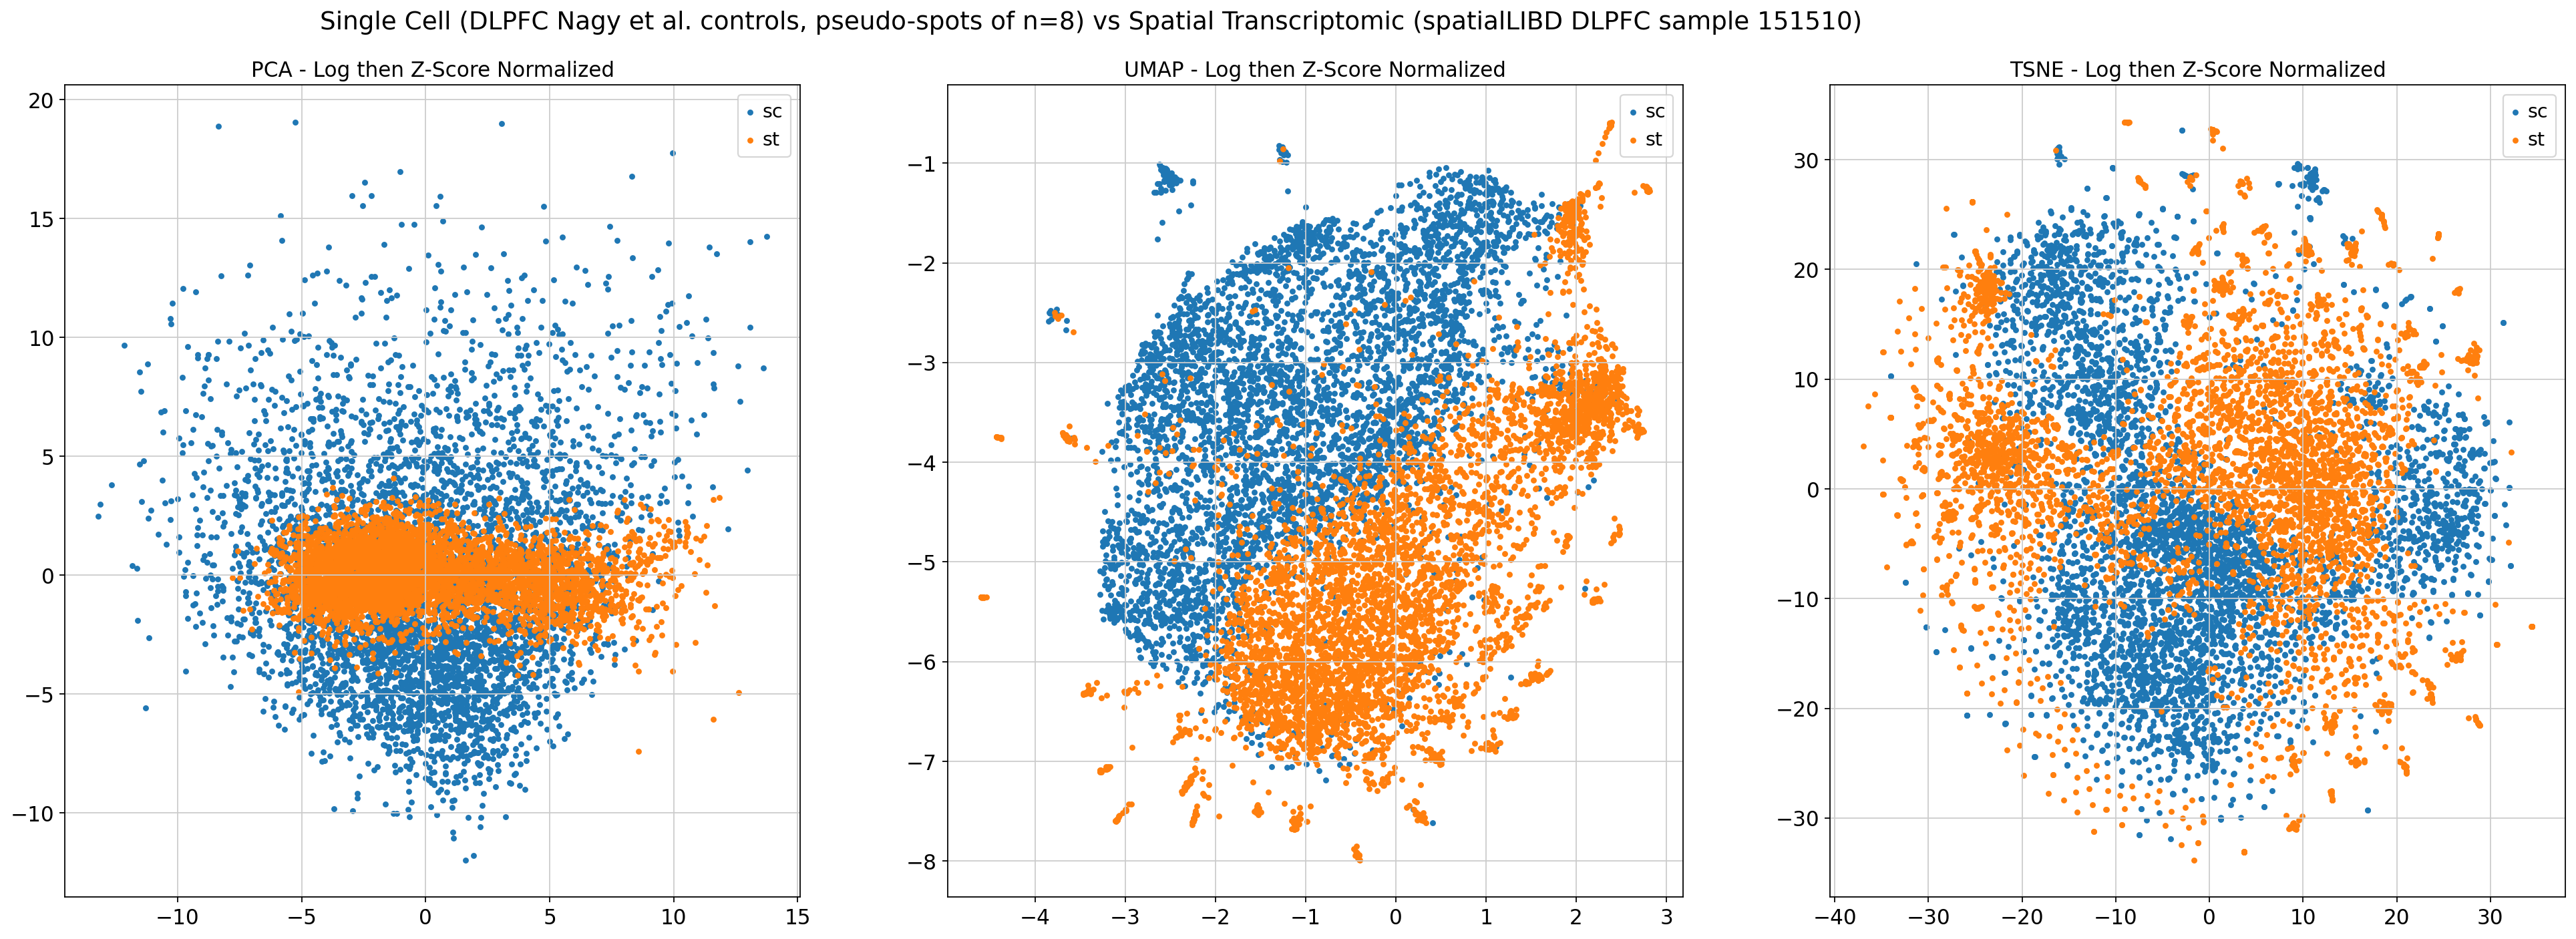

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))
# plot_scatter_subfig(data_pca, all_df.index.get_level_values(0).to_numpy(), axs[0][0], title=f'PCA - Min-Max Normalized', legend=['sc', 'st'])
# plot_scatter_subfig(data_umap, all_df.index.get_level_values(0).to_numpy(), axs[0][1], title=f'UMAP - Min-Max Normalized', legend=['sc', 'st'])

plot_scatter_subfig(data_pca_z, all_z_df.index.get_level_values(0).to_numpy(), axs[0], title=f'PCA - Log then Z-Score Normalized', legend=['sc', 'st'])
plot_scatter_subfig(data_umap_z, all_z_df.index.get_level_values(0).to_numpy(), axs[1], title=f'UMAP - Log then Z-Score Normalized', legend=['sc', 'st'])
plot_scatter_subfig(data_tsne_z, all_z_df.index.get_level_values(0).to_numpy(), axs[2], title=f'TSNE - Log then Z-Score Normalized', legend=['sc', 'st'])


    
    
fig.suptitle(f'Single Cell (DLPFC Nagy et al. controls, pseudo-spots of n=8) vs Spatial Transcriptomic (spatialLIBD DLPFC sample {all_z_df.loc[1].index.get_level_values(0)[0]})')

plt.show(block=False)

In [95]:
Z = sch.linkage(all_z_df, method='ward', metric = 'euclidean')

/tmp/ipykernel_30683/856991027.py:72: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(neg, cax=cbaxes, orientation='horizontal',


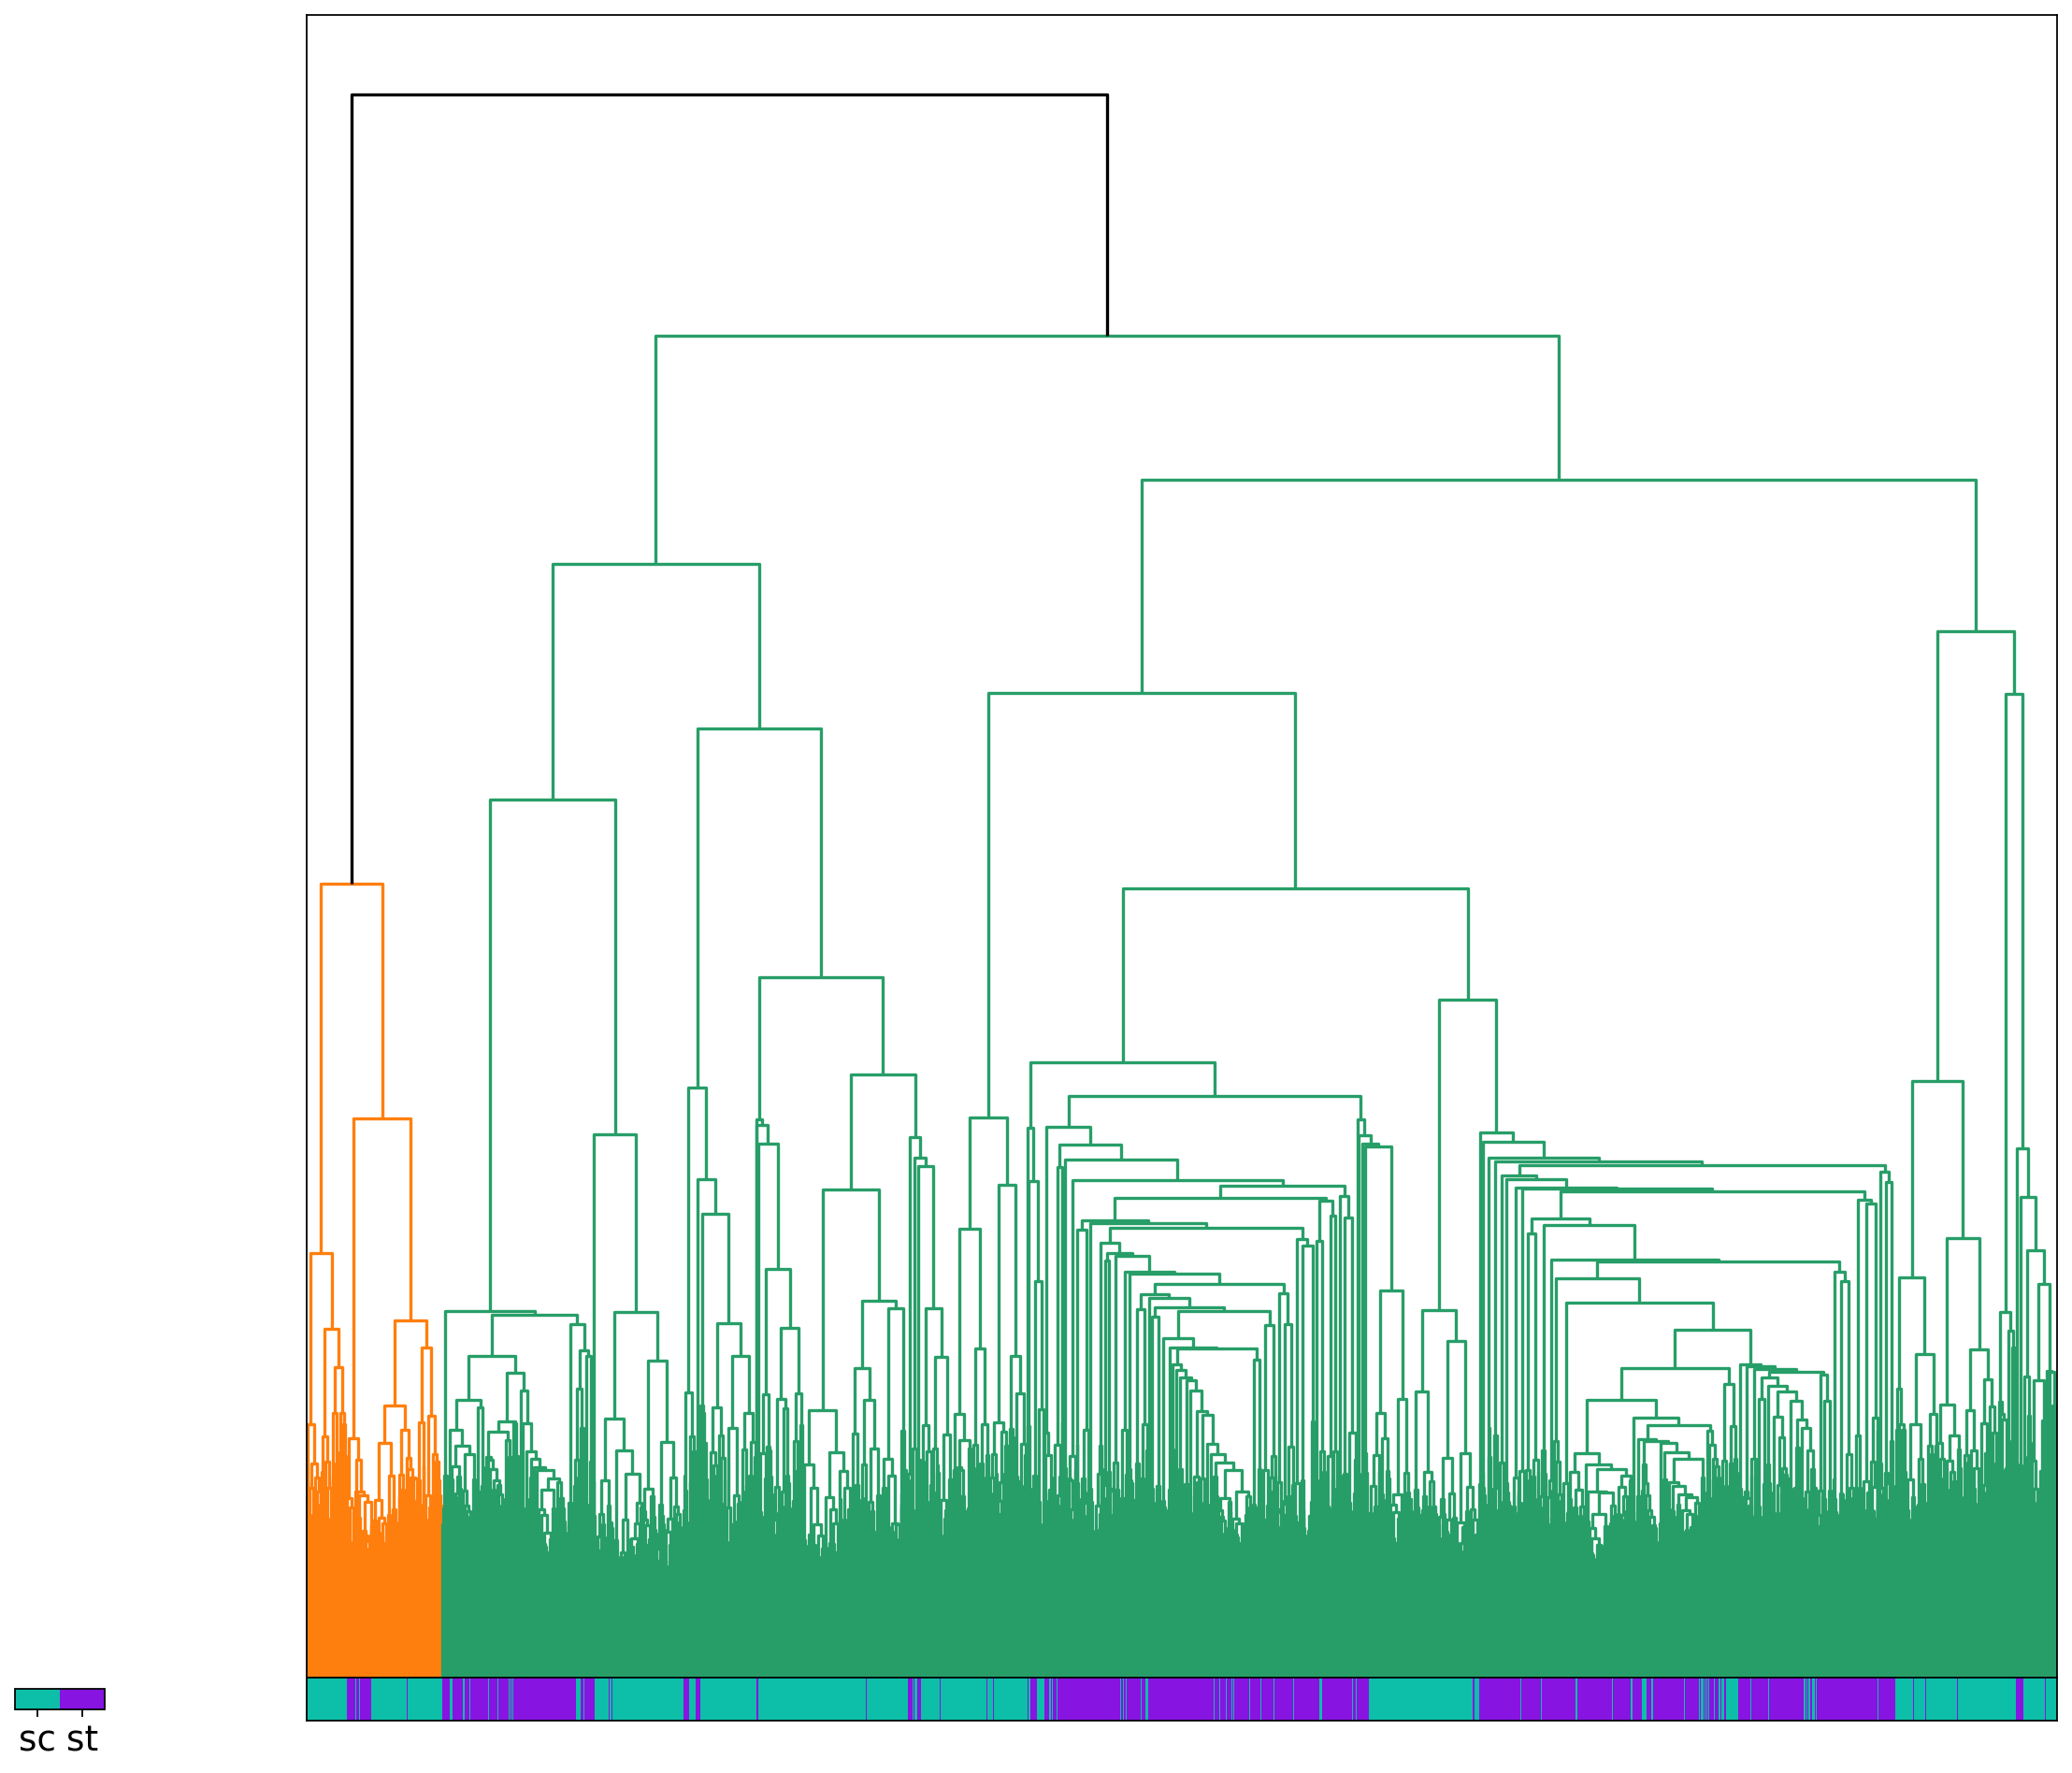

In [96]:
# # import matplotlib.cm
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)),
        N=n
    )
    return new_cmap

from matplotlib.colors import rgb2hex
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2,
                       1,
                       height_ratios=[39, 1],
                       hspace=0.00)

ax2 = fig.add_subplot(gs[0])#add_axes([0,0.75,1,0.45])




clust_labels = all_z_df.index.get_level_values(0).to_numpy()

Z2 = sch.dendrogram(Z, color_threshold = Z[len(Z) - 2+1,2],  above_threshold_color='k')

ax2.set_xticks([])
ax2.set_yticks([])

# label clusters
clust_labels_dendo = clust_labels[Z2['leaves']]

idx2 = Z2['leaves']





axb = fig.add_subplot(gs[1])


cat_vals = clust_labels[idx2]

n=(~np.isnan(np.unique(cat_vals))).sum()

cmap = plt.cm.get_cmap('bwr', n)
cmap = mcolors.ListedColormap(['#0dbea8', '#8714e1'])

cmap.set_bad('white',1.)

neg = axb.matshow(np.atleast_2d(cat_vals),
                       aspect='auto',
                       origin='lower',
                            cmap=cmap)

pos1 = axb.get_position() # get the original position 
cbaxes = fig.add_axes([0.05, pos1.y0 + pos1.height / 4.0,  0.08*(~np.isnan(np.unique(cat_vals))).sum()/4, pos1.height / 2.0])
ticks = np.unique(cat_vals[~np.isnan(cat_vals)])
cbar = fig.colorbar(neg, cax=cbaxes, orientation='horizontal',
                    ticks=[tick-(tick-ticks.mean())/len(ticks) for tick in ticks])
#                             ticks=ticks
#         tick_locs = (np.arange(n) + 0.5)*(n-1)/n
#         cbar.ax.set_ticks(tick_locs)

cbar.ax.set_xticklabels(['sc', 'st'],rotation=0,fontsize='large')


axb.set_yticks([])
axb.set_xticks([])
    # axb.text(-0.01,
    #      0.5,
    #      cat_bar_var,
    #      horizontalalignment='right',
    #      verticalalignment='center',
    #      transform=bar_axs_cat[i].transAxes,
    #                     fontsize='large'
    #     )
#     bar_axs_cat[i].legend(np.unique(labels[cat_bar_var][[(legend[cat_bar_var][label_name] != 'Indeterminate') for label_name in labels[cat_bar_var]]]).tolist(),
#                           [x for x in legend[cat_bar_var] if x != 'Indeterminate'])
    


#     for vert_po in vert_pos:
#         bar_axs_cat[i].axvline(vert_po, color='k', alpha=1)

# pos_hm = axmatrix.get_position()
# cbaxes = fig.add_axes([0.05, pos_hm.y0+ pos1.height*2, 0.13, pos1.height])  #[left, bottom, width, height]
# cbar = plt.colorbar(im,
#                     cax=cbaxes,
#                     orientation='horizontal',
#                     ticks=[1/(1+np.exp(steeepness*2)),
#                            1/(1+np.exp(steeepness*1)),
#                            1/(1+np.exp(steeepness*0)),
#                            1/(1+np.exp(-steeepness*1)),
#                            1/(1+np.exp(-steeepness*2))])
# cbar.ax.set_xticklabels(['-2', '-1', '0', '1', '2'], fontsize='xx-large')  # vertically oriented colorbar
# cbar.ax.xaxis.tick_left()

# fig.suptitle("\n".join(wrap(f'Dendogram and Heatmap - {params_clust["num_clusters"]} Clusters - subset={subset_str}', 100)),y=0.9)

# plt.savefig(os.path.join(results_dir_out, f'Dendo_heat-{params_clust["num_clusters"]}_clusters.png'), dpi=300)
plt.show(block=False)


In [97]:
agglo_clust = sch.cut_tree(Z, n_clusters=2).T[0]

In [98]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf =  RandomForestClassifier(random_state=23, n_jobs=-1)
# clf = SVC(gamma=2, C=1)
# clf = LogisticRegression()



X_train, X_test, y_train, y_test = train_test_split(
    all_z_df, all_z_df.index.get_level_values(0).to_numpy(), test_size=0.2, random_state=256
)

clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(1.0, 1.0)

In [99]:
y_test.mean(), y_train.mean()

(0.47950377562028046, 0.5051254383598597)

In [100]:
clf = SVC(random_state=20)
# clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.9719525350593312, 0.9987860803884543)

In [101]:
# clf = SVC(gamma=2, C=1)
clf = LogisticRegression(random_state=27)
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.3629989212513484, 0.5405988670083626)